<a href="https://colab.research.google.com/github/ejri/Synopsis/blob/cohort2/energy_consumption_data_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 10


How to convert a series of date-strings to a timeseries?

In [0]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [0]:
ser

0         01 Jan 2010
1          02-02-2011
2            20120303
3          2013/04/04
4          2014-05-05
5    2015-06-06T12:20
dtype: object

In [0]:
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

How to get the day of month, week number, day of year and day of week from a series of date strings?

In [0]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

'''
Desired output

Date:  [1, 2, 3, 4, 5, 6]
Week number:  [53, 5, 9, 14, 19, 23]
Day num of year:  [1, 33, 63, 94, 125, 157]
Day of week:  ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']
'''

"\nDesired output\n\nDate:  [1, 2, 3, 4, 5, 6]\nWeek number:  [53, 5, 9, 14, 19, 23]\nDay num of year:  [1, 33, 63, 94, 125, 157]\nDay of week:  ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']\n"

In [0]:
pd.to_datetime(ser).dt.day.to_list()
# day of week


[1, 2, 3, 4, 5, 6]

In [0]:
pd.to_datetime(ser).dt.week.to_list()
# week of year


[53, 5, 9, 14, 19, 23]

In [0]:
pd.to_datetime(ser).dt.weekofyear.to_list()
# week of year

[53, 5, 9, 14, 19, 23]

In [0]:
pd.to_datetime(ser).dt.dayofyear.to_list()
# day of year in words


[1, 33, 63, 94, 125, 157]

In [0]:
week_dict = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
pd.to_datetime(ser).dt.dayofweek.map(week_dict).to_list()
# another method
pd.to_datetime(ser).dt.weekday_name.to_list()

['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']

How to convert year-month string to dates corresponding to the 4th day of the month?

In [0]:
# input
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

'''
Desired Output

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

'''

'\nDesired Output\n\n0   2010-01-04\n1   2011-02-04\n2   2012-03-04\ndtype: datetime64[ns]\n\n'

In [0]:
# solution using parser
from dateutil.parser import parse
ser.map(lambda x: parse('04 ' + x))

# another solution

from dateutil.parser import parse
# Parse the date
ser_ts = ser.map(lambda x: parse(x))

# Construct date string with date as 4
ser_datestr = ser_ts.dt.year.astype('str') + '-' + ser_ts.dt.month.astype('str') + '-' + '04'

# Format it.
[parse(i).strftime('%Y-%m-%d') for i in ser_datestr]

['2010-01-04', '2011-02-04', '2012-03-04']

How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?

In [0]:

ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))

'''
Desired Output

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
'''

'\nDesired Output\n\n2000-01-01     1.0\n2000-01-02     1.0\n2000-01-03    10.0\n2000-01-04    10.0\n2000-01-05    10.0\n2000-01-06     3.0\n2000-01-07     3.0\n2000-01-08     NaN\n'

In [0]:
# first let's fill the missing dates
indx = pd.date_range("2000-01-01", "2000-01-08")
# now let's reindex the series ser with the new index
# we have to reasing back to ser
ser = ser.reindex(indx)
# lastly let's populate the missing values
ser.fillna(method = "ffill")


2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     3.0
Freq: D, dtype: float64

How to compute the autocorrelations of a numeric series?

In [0]:
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

'''
Desired Output

# values will change due to randomness
[0.29999999999999999, -0.11, -0.17000000000000001, 0.46000000000000002, 0.28000000000000003, -0.040000000000000001, -0.37, 0.41999999999999998, 0.47999999999999998, 0.17999999999999999]
Lag having highest correlation:  9
'''

'\nDesired Output\n\n# values will change due to randomness\n[0.29999999999999999, -0.11, -0.17000000000000001, 0.46000000000000002, 0.28000000000000003, -0.040000000000000001, -0.37, 0.41999999999999998, 0.47999999999999998, 0.17999999999999999]\nLag having highest correlation:  9\n'

In [0]:
ser.autocorr(lag = 10)

0.03784982685032025

**Stages in Time Series Forecasting**

Solving a time series problem is a little different as compared to a regular modeling task. A simple/basic journey of solving a time series problem can be demonstrated through the following processes. 

1. Visualizing time series
In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.
2. Stationarising time series
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarised”) through the use of mathematical transformations. A stationarised series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! Another reason for trying to stationarise a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables
3. Finding the best parameters for our model
We need to find optimal parameters for forecasting models one’s we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting above two graphs and extracting optimal model parameters based on them. Do not worry, we will cover on how to determine these parameters during the implementation part below!
4. Fitting model
Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series. Always remember that time series algorithms work on stationary data only hence making a series stationary is an important aspect
5. Predictions
After fitting our model, we will be predicting the future in this stage. Since we are now familiar with a basic flow of solving a time series problem, let us get to the implementation.


# New Section

In [0]:
df= pd.read_csv('TSLA.csv')
#df= pd.read_csv('https://raw.githubusercontent.com/sahand68/datasets/master/Electric_Production.csv')

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [34]:
#df.columns=['Date','Consumption']
df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


# Visualizing the time series

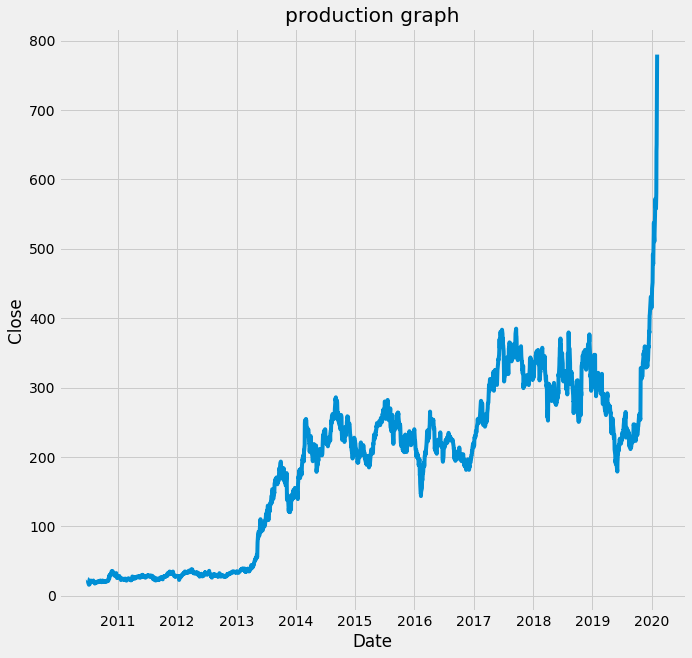

In [38]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel("Date")
#plt.ylabel("Consumption")
plt.ylabel("Close")
plt.title("production graph")
plt.plot(df)

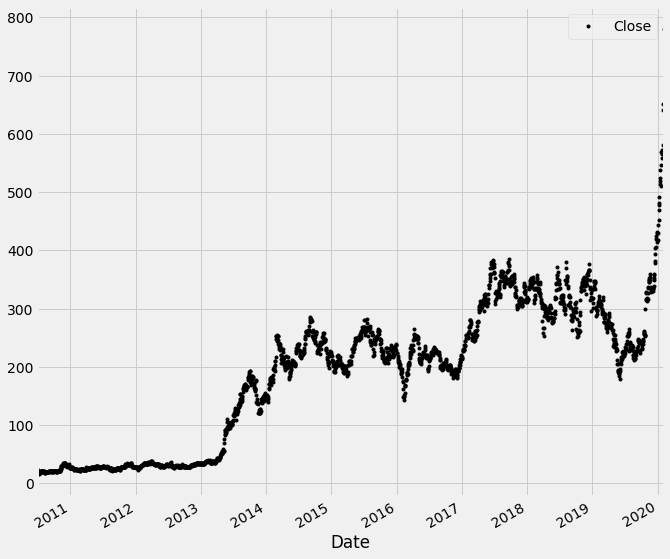

In [39]:
df.plot(style='k.')
plt.show()

Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.
These components are defined as follows:
- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

let us separate Trend and Seasonality from the time series

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

ValueError: ignored

Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.

# 2. Stationarising the time series.

we need to check if a series is stationary or not

ADF (Augmented Dickey-Fuller) Test



```
# This is formatted as code
```

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

- Null Hypothesis: The series has a unit root (value of a =1)

- Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).


- If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.
- The following function is one that can plot a series with its rolling mean and standard deviation.

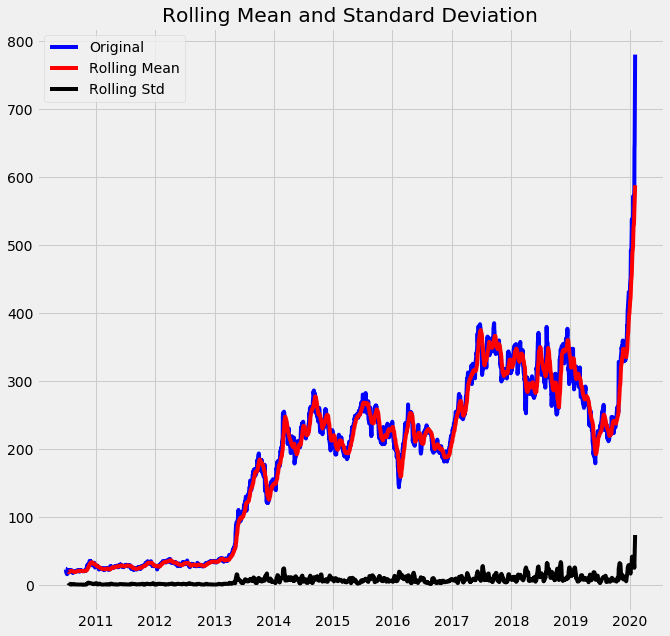

Results of dickey fuller test
Test Statistics                   1.400069
p-value                           0.997114
No. of lags used                 18.000000
Number of observations used    2397.000000
critical value (1%)              -3.433081
critical value (5%)              -2.862747
critical value (10%)             -2.567412
dtype: float64


In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    #adft = adfuller(timeseries['Consumption'],autolag='AIC')
    
    adft = adfuller(timeseries['Close'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.
To get a stationary series, we need to eliminate the trend and seasonality from the series.

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

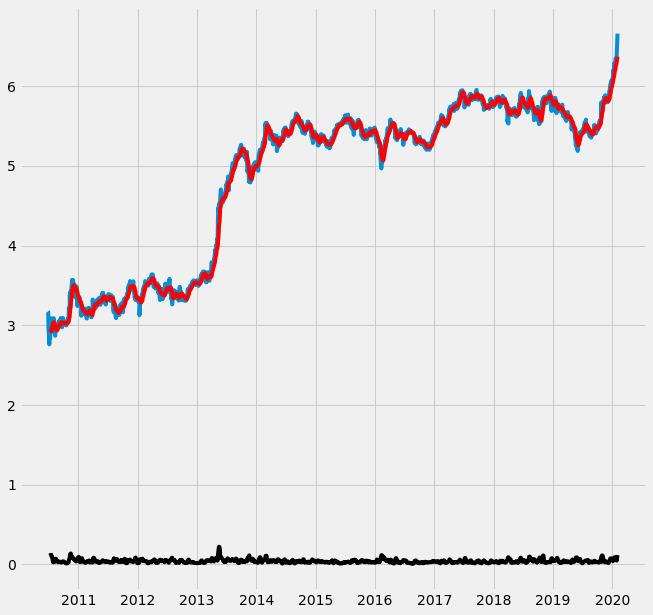

In [42]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.
This way, we eliminate trends out of a series and obtain a more stationary series.

In [0]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

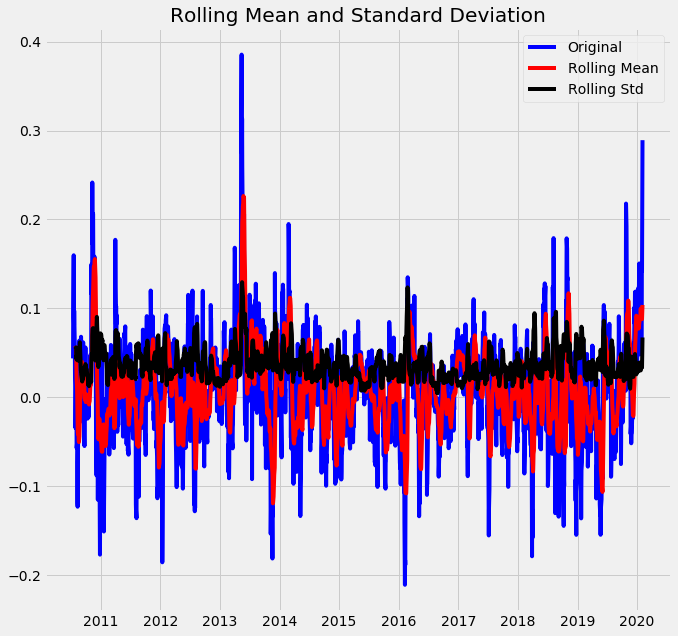

Results of dickey fuller test
Test Statistics               -9.716740e+00
p-value                        9.784263e-17
No. of lags used               1.100000e+01
Number of observations used    2.393000e+03
critical value (1%)           -3.433086e+00
critical value (5%)           -2.862749e+00
critical value (10%)          -2.567413e+00
dtype: float64


In [44]:
#Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.
test_stationarity(df_log_moving_avg_diff)


We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation

In [0]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

In [46]:
print(weighted_average.head())

               Close
Date                
2010-06-29  3.173460
2010-06-30  3.172166
2010-07-01  3.142907
2010-07-02  3.091761
2010-07-06  3.021881


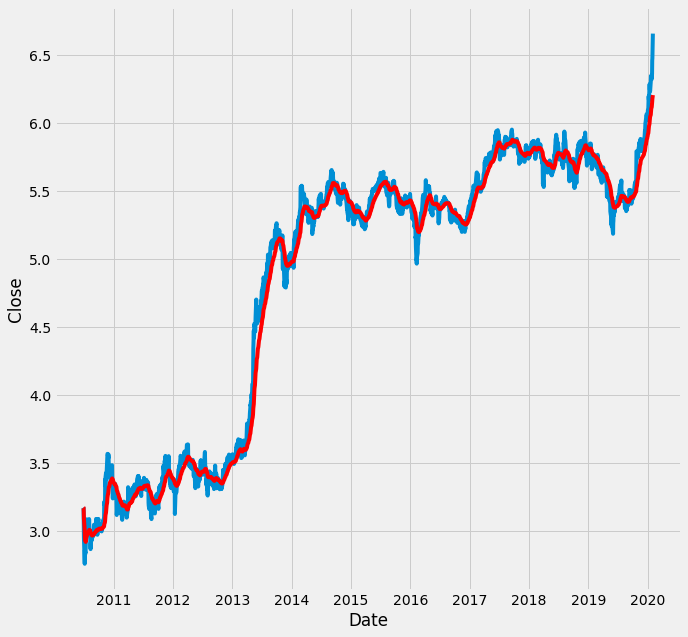

In [47]:
'''
the exponential moving average (EMA) is a weighted average of the last n prices, 
where the weighting decreases exponentially with each previous price/period. 
In other words, the formula gives recent prices more weight than past prices.
'''
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
#plt.ylabel("Consumption")
plt.ylabel("Close")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

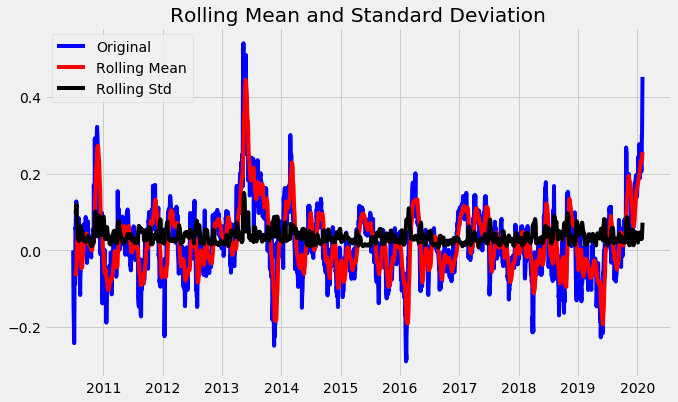

Results of dickey fuller test
Test Statistics               -7.764595e+00
p-value                        9.260120e-12
No. of lags used               0.000000e+00
Number of observations used    2.415000e+03
critical value (1%)           -3.433061e+00
critical value (5%)           -2.862738e+00
critical value (10%)          -2.567408e+00
dtype: float64


In [48]:
#Previously we subtracted data_logscale with moving average, now take the same log_scale and subtract with weighted_average
logScale_weightedMean = df_log-weighted_average
# use the same function defined above and pass the object into it.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

There can be cases when there is a high seasonality in the data. 
In those cases, just removing the trend will not help much. 
We need to also take care of the seasonality in the series. 
One such method for this task is differencing!

Differencing is a method of transforming a time series dataset. 
It can be used to remove the series dependence on time, so-called temporal dependence. 

This includes structures like trends and seasonality. Differencing can help stabilize the mean
of the time series by removing changes in the level of a time series, and so eliminating (or reducing) 
trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.

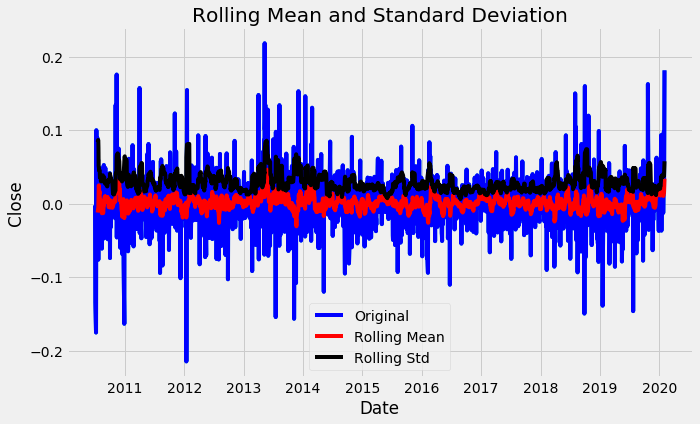

Results of dickey fuller test
Test Statistics                 -48.272207
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    2414.000000
critical value (1%)              -3.433062
critical value (5%)              -2.862738
critical value (10%)             -2.567408
dtype: float64


In [49]:

df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
#plt.ylabel("Consumption")
plt.ylabel("Close")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)

test_stationarity(df_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

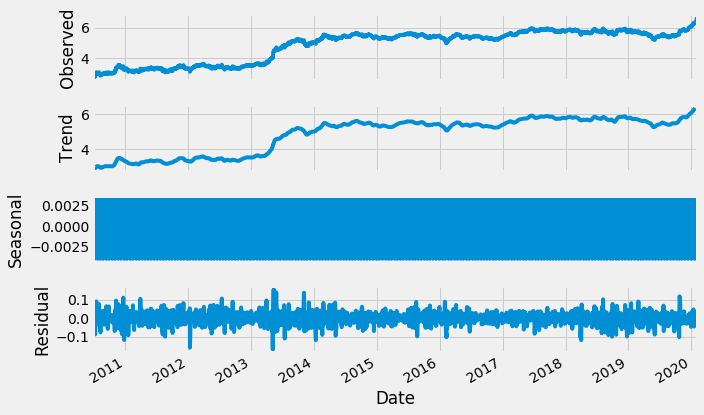

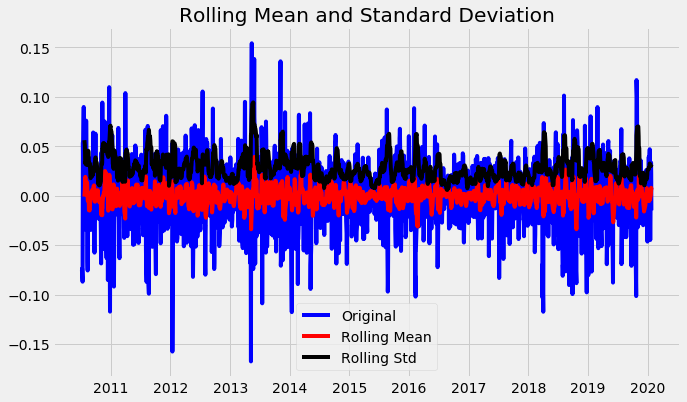

Results of dickey fuller test
Test Statistics               -1.478271e+01
p-value                        2.232682e-27
No. of lags used               2.600000e+01
Number of observations used    2.377000e+03
critical value (1%)           -3.433104e+00
critical value (5%)           -2.862757e+00
critical value (10%)          -2.567418e+00
dtype: float64


In [50]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

# Forecasting


Before we go on to build our forecasting model, 
we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.
A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:
p is the number of autoregressive terms,
d is the number of nonseasonal differences needed for stationarity, and
q is the number of lagged forecast errors in the prediction equation.
Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!





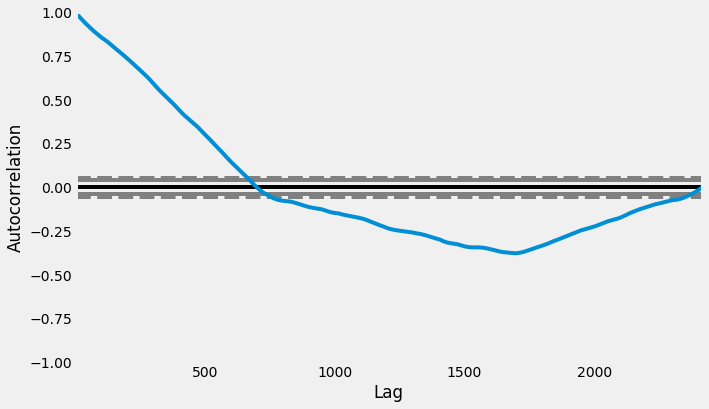

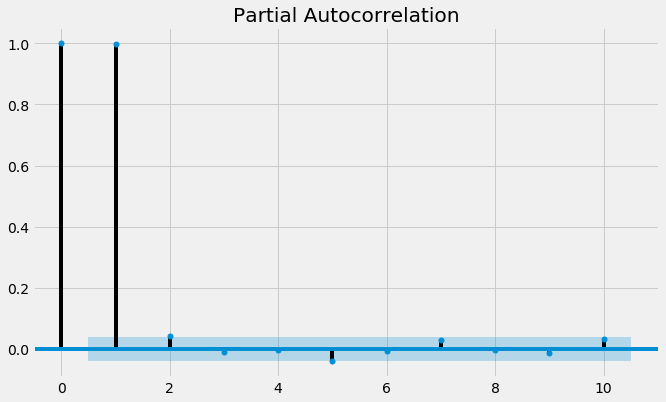

In [51]:

#Below code plots, both ACF and PACF plots for us
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
autocorrelation_plot(df_log)
plot_pacf(df_log, lags=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


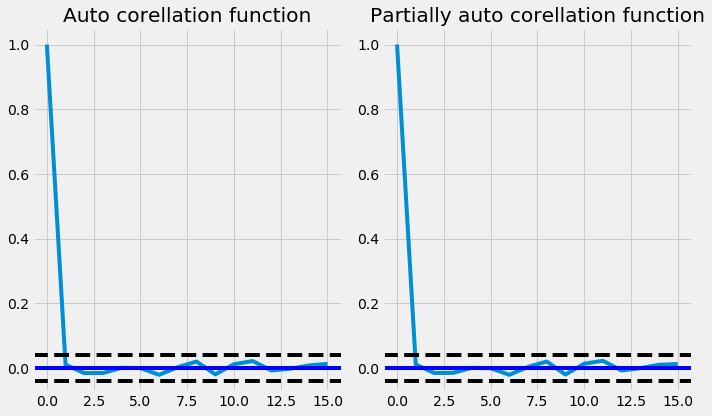

In [52]:
# plot acf  and pacf graphs ( auto corellation function and partially auto corellation function )
# to find 'p' from p,d,q we need to use, PACF graphs and for 'q' use ACF graph
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')

# ols stands for ordinary least squares used to minimise the errors

# 121 and 122 makes the data to look side by size 

#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()


#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()


- hat suggests AR(q) terms in a model?
-  ACF shows a decay
-vPACF cuts off quickly
- What suggests MA(p) terms in a model?
- ACF cuts off sharply
- PACF decays gradually
In PACF, the plot crosses the first dashed line(95% confidence interval line) around lag 2 hence p=2
Below code fits an ARIMA model for us

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


RSS : 2.548200


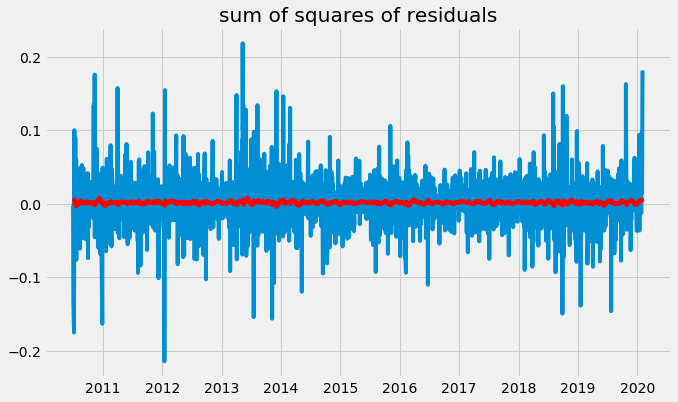

In [54]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Close"])**2))

less the RSS more effective the model is

# forecast electricity consumption for next 4 months

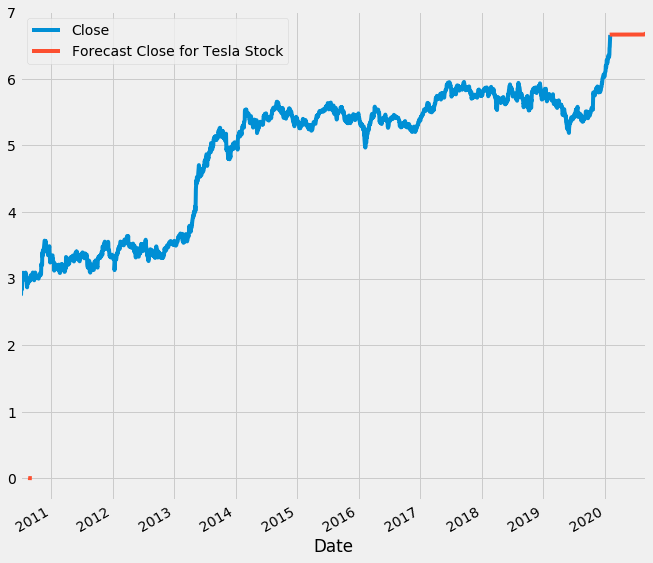

In [77]:
future=df_log
future=future.reset_index()
mon=future["Date"]
mon=mon+pd.DateOffset(months=7)
future_dates = mon[-7-1:]
future = future.set_index('Date')
newDf = pd.DataFrame(index=future_dates, columns=future.columns)
future = pd.concat([future,newDf])
future["Forecast Close for Tesla Stock"]= result_AR.predict(start=35, end =50, dynamic=True)
future["Forecast Close for Tesla Stock"].iloc[-10:]=result_AR.forecast(steps=10)[0]
future[['Close','Forecast Close for Tesla Stock']].plot()


# future["Forecast Consupmtion"]= result_AR.predict(start=35, end =43, dynamic=True)
# future["Forecast Consupmtion"].iloc[-10:]=result_AR.forecast(steps=10)[0]
# future[['Consupmtion','Forecast Consupmtion']].plot()

In [78]:
 #we founded the predicted values in the above code and we need to print the values in the form of series
ARIMA_predicts = pd.Series(result_AR.fittedvalues,copy=True)
ARIMA_predicts.head()

# finding the cummulative sum
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())


Date
2010-06-30    0.001456
2010-07-01    0.002868
2010-07-02    0.003448
2010-07-06    0.004628
2010-07-07    0.006931
dtype: float64


In [79]:
#ARIMA_predicts_log = pd.Series(df_log['Consumption'],index = df_log.index)
ARIMA_predicts_log = pd.Series(df_log['Close'],index = df_log.index)

ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

Date
2010-06-29    3.173460
2010-06-30    3.172401
2010-07-01    3.092090
2010-07-02    2.958358
2010-07-06    2.784068
dtype: float64


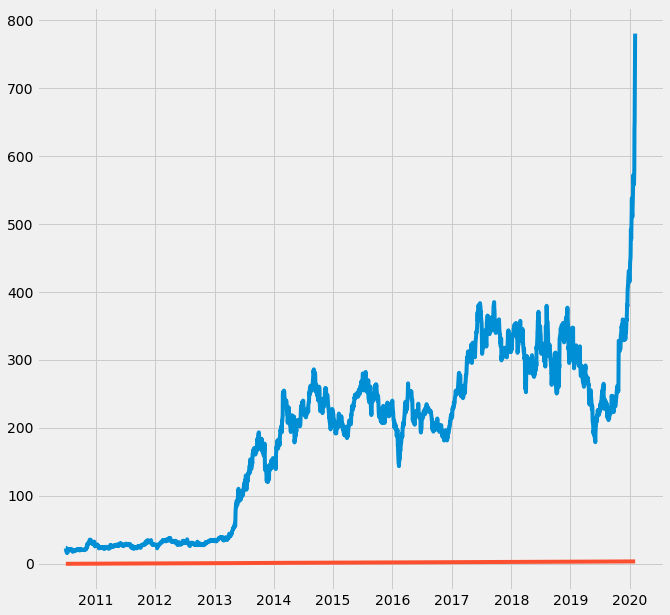

In [80]:
# converting back to the exponential form results in getting back to the original data.
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(df)
plt.plot(ARIMA_predicts_cumsum)

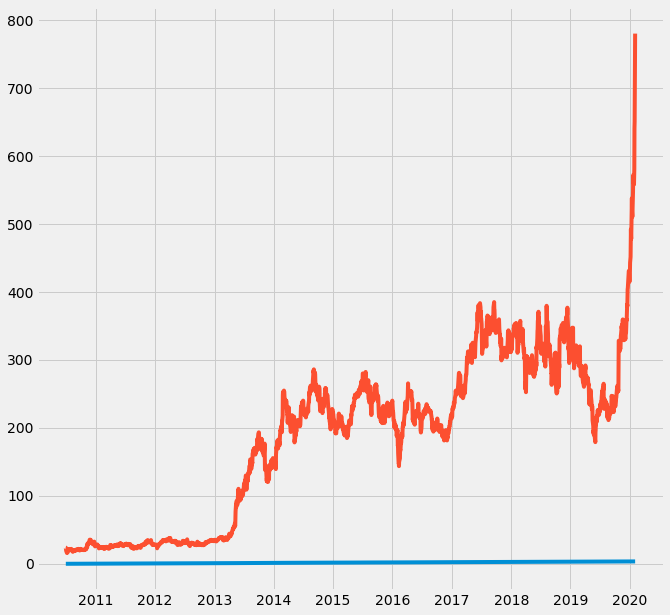

In [81]:
plt.plot(ARIMA_predicts_cumsum)
plt.plot(df)

# future prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


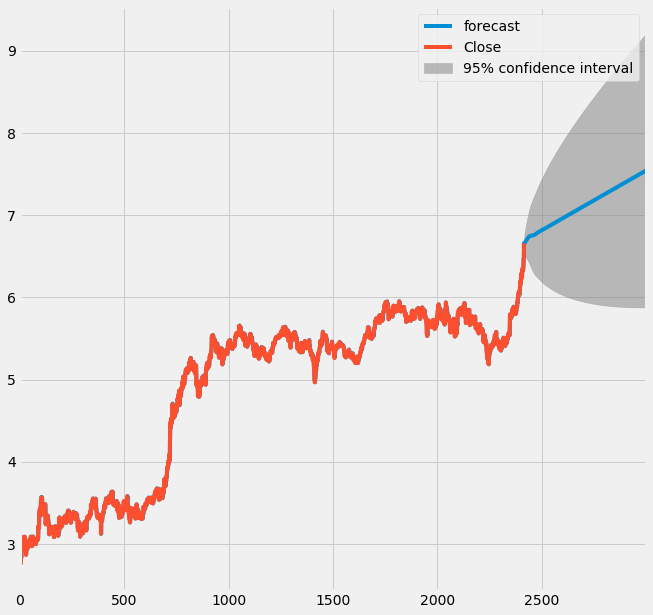

In [97]:

result_AR.plot_predict(1,3000)
x=result_AR.forecast(steps=10)

# from the above graph, we calculated the future predictions till 2024
# the greyed out area is the confidence interval wthe predictions will not cross that area.